In [1]:
# !pip install ipykernel==5.5.6
# !pip install jupyter-client<8,>=5.3.4

# !pip install jupyterlab
# !pip install jedi

# %config Completer.use_jedi = False


# **Library Imports**

In [5]:
import os
import random
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [7]:
print(os.getcwd())
address = os.getcwd() + "/archive" 

/home/lsh-ast/Downloads/ast/asvspoof


In [8]:
# Define the paths to the audio files
la_paths = [
    address+"/ASVspoof2019_LA_train/flac",
]
print(la_paths)

# Combine file paths
file_list = []
for path in la_paths:
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".flac"):
                file_list.append({"File Path": os.path.join(root, file), "File Name": file})

la_df = pd.DataFrame(file_list)
print(f"Total number of audio files: {len(la_df)}")
la_df.head()

['/home/lsh-ast/Downloads/ast/asvspoof/archive/ASVspoof2019_LA_train/flac']
Total number of audio files: 25380


,File Path,File Name
0,/home/lsh-ast/Downloads/ast/asvspoof/archive/A...,LA_T_2578586.flac
1,/home/lsh-ast/Downloads/ast/asvspoof/archive/A...,LA_T_5112179.flac
2,/home/lsh-ast/Downloads/ast/asvspoof/archive/A...,LA_T_3434954.flac
3,/home/lsh-ast/Downloads/ast/asvspoof/archive/A...,LA_T_6928938.flac
4,/home/lsh-ast/Downloads/ast/asvspoof/archive/A...,LA_T_5176249.flac


# **Extacting Important Featues From Metadata**

In [13]:
# Define the path to the metadata file
la_metadata_path = address + "/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"

la_train_labels = pd.read_csv(la_metadata_path, sep=' ', header=None)

la_metadata = pd.read_csv(la_metadata_path, sep=" ", header=None, names=["Speaker", "File Name", "Unknown1", "Unknown2", "Label"])


la_df["File Name"] = la_df["File Name"].str.replace(".flac", "")

df_with_labels = pd.merge(la_df, la_metadata[["File Name", "Label"]], on="File Name", how="left")

output_path = "../egs/asvspoof2021/train_la_data.csv"

df_with_labels.to_csv(output_path, index=False) 
print(f"Saved the metadata to {output_path}")



Saved the metadata to ../egs/asvspoof2021/train_la_data.csv


# **Merging Metadata with Audio Files**

* # Standardizing Audio data and Metadata

In [7]:
# Check the unique values in the File Name columns to understand the format
print("Audio DataFrame File Names:")
print(deepfake_df['File Name'].unique()[:10])

print("\nMetadata DataFrame File Names:")
print(df_important_features['File Name'].unique()[:10])


Audio DataFrame File Names:
['DF_E_2522265.flac' 'DF_E_2249110.flac' 'DF_E_2594651.flac'
 'DF_E_2445939.flac' 'DF_E_2117315.flac' 'DF_E_2141575.flac'
 'DF_E_2542864.flac' 'DF_E_2520258.flac' 'DF_E_2473558.flac'
 'DF_E_2667786.flac']

Metadata DataFrame File Names:
['DF_E_2000011' 'DF_E_2000013' 'DF_E_2000024' 'DF_E_2000026'
 'DF_E_2000027' 'DF_E_2000028' 'DF_E_2000031' 'DF_E_2000032'
 'DF_E_2000040' 'DF_E_2000042']


In [8]:
# Remove the .flac extension from the File Name in audio_df
deepfake_df['File Name'] = deepfake_df['File Name'].str.replace('.flac', '')

# Convert both to lowercase using .loc to avoid the SettingWithCopyWarning
deepfake_df['File Name'] = deepfake_df['File Name'].str.lower()
df_important_features.loc[:, 'File Name'] = df_important_features['File Name'].str.lower()

# Print to check the standardized values
print("Standardized deepfake DataFrame File Names:")
print(deepfake_df['File Name'].unique()[:10])

print("\nStandardized Metadata DataFrame File Names:")
print(df_important_features['File Name'].unique()[:10])


Standardized deepfake DataFrame File Names:
['df_e_2522265' 'df_e_2249110' 'df_e_2594651' 'df_e_2445939'
 'df_e_2117315' 'df_e_2141575' 'df_e_2542864' 'df_e_2520258'
 'df_e_2473558' 'df_e_2667786']

Standardized Metadata DataFrame File Names:
['df_e_2000011' 'df_e_2000013' 'df_e_2000024' 'df_e_2000026'
 'df_e_2000027' 'df_e_2000028' 'df_e_2000031' 'df_e_2000032'
 'df_e_2000040' 'df_e_2000042']


In [9]:
# Remove the .flac extension from the File Name in la_df
la_df['File Name'] = la_df['File Name'].str.replace('.flac', '')

# Convert both to lowercase using .loc to avoid the SettingWithCopyWarning
la_df['File Name'] = la_df['File Name'].str.lower()
la_important_features.loc[:, 'File Name'] = la_important_features['File Name'].str.lower()

# Print to check the standardized values
print("Standardized la_df File Names:")
print(la_df['File Name'].unique()[:10])

print("\nStandardized la_important_features File Names:")
print(la_important_features['File Name'].unique()[:10])

Standardized la_df File Names:
['la_e_4141297' 'la_e_4012597' 'la_e_1550729' 'la_e_1627641'
 'la_e_9987668' 'la_e_8170347' 'la_e_5541002' 'la_e_4728747'
 'la_e_5933815' 'la_e_8475019']

Standardized la_important_features File Names:
['la_e_9332881' 'la_e_6866159' 'la_e_5464494' 'la_e_4759417'
 'la_e_2667748' 'la_e_8589971' 'la_e_1911364' 'la_e_5298786'
 'la_e_2042719' 'la_e_5449181']


* # The Merge

In [10]:
# Merge the audio DataFrame with the metadata DataFrame on File Name
combined_df_df= pd.merge(deepfake_df, df_important_features, on="File Name")
print(f"Total number of combined records: {len(combined_df_df)}")
combined_df_df.head(10)

combined_la_df= pd.merge(la_df, la_important_features, on="File Name")
print(f"Total number of combined records: {len(combined_la_df)}")
combined_la_df.head(10)

Total number of combined records: 611829
Total number of combined records: 181566


,File Path,File Name,Label
0,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_4141297,spoof
1,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_4012597,spoof
2,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_1550729,spoof
3,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_1627641,spoof
4,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_9987668,spoof
5,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_8170347,spoof
6,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_5541002,spoof
7,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_4728747,spoof
8,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_5933815,spoof
9,/Users/minsmacbook/Documents/GitHub/ast/asvspo...,la_e_8475019,spoof


In [11]:
# Count the occurrences of each label in the merged DataFrame
label_counts = combined_df_df['Label'].value_counts()

# Display the counts of each label
print("Count of each label in the merged data:")
print(label_counts)

Count of each label in the merged data:
Label
spoof       589212
bonafide     22617
Name: count, dtype: int64


In [12]:
# Count the occurrences of each label in the merged DataFrame
label_counts = combined_la_df['Label'].value_counts()

# Display the counts of each label
print("Count of each label in the merged data:")
print(label_counts)


Count of each label in the merged data:
Label
spoof       163114
bonafide     18452
Name: count, dtype: int64


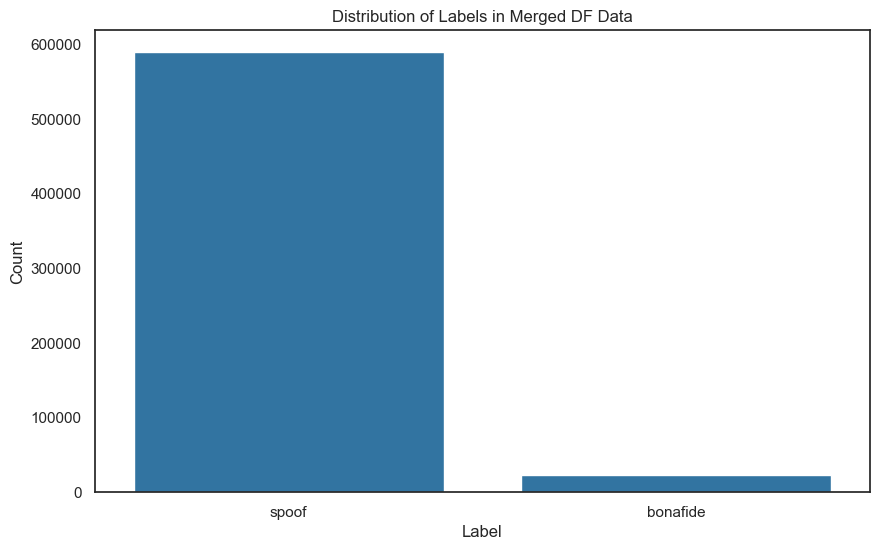

In [13]:
# Plot the distribution of labels to visualize the counts of each class
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df_df, x='Label')
plt.title('Distribution of Labels in Merged DF Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

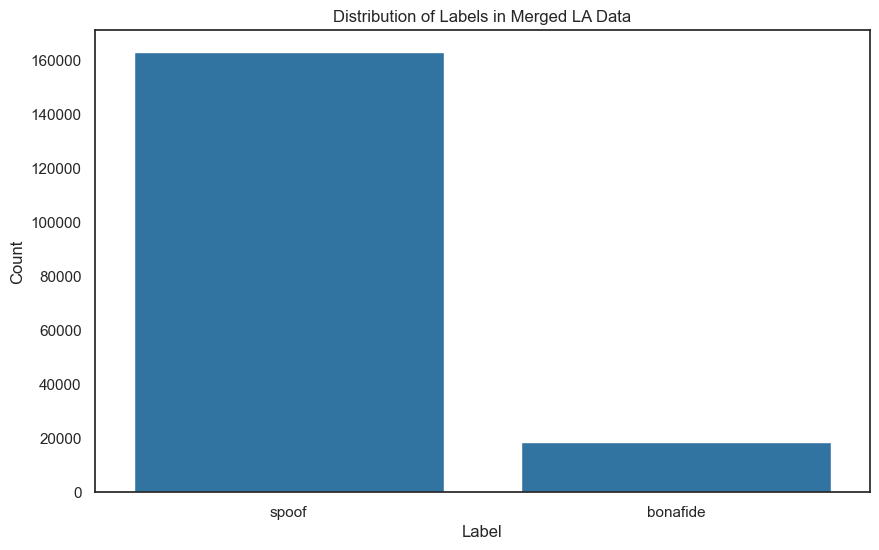

In [14]:
# Plot the distribution of labels to visualize the counts of each class
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_la_df, x='Label')
plt.title('Distribution of Labels in Merged LA Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [15]:
spoof_file1 = combined_df_df["File Path"][0]

In [16]:
# Load the .flac file
def load_audio(file_path, sample_rate=16000):
    audio_data, sr = librosa.load(file_path, sr=sample_rate)
    return audio_data, sr

# Generate the 128-dimensional log Mel filterbank features (fbank)
def generate_mel_spectrogram(audio_data, sample_rate, n_fft=400, hop_length=160, n_mels=128):
    mel_spectrogram = librosa.feature.melspectrogram(
        y=audio_data,
        sr=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )
    return mel_spectrogram

# Convert Mel-spectrogram to log scale (log Mel-spectrogram)
def log_mel_spectrogram(mel_spectrogram):
    log_mel = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return log_mel

# Normalize the log Mel-spectrogram to a range that fits AST expectations
def normalize_spectrogram(spectrogram):
    mean = np.mean(spectrogram)
    std = np.std(spectrogram)
    normalized_spectrogram = (spectrogram - mean) / std
    normalized_spectrogram = normalized_spectrogram * 0.5  # Adjusting scale
    return normalized_spectrogram

# Function to plot the log Mel-spectrogram
def plot_spectrogram(log_mel_spectrogram, sample_rate, hop_length, title):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_mel_spectrogram, 
                             sr=sample_rate, 
                             hop_length=hop_length, 
                             x_axis='time', 
                             y_axis='mel', 
                             fmax=sample_rate // 2)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Reshape the spectrogram to (1, time, frequency) for AST
def reshape_spectrogram(spectrogram):
    # Ensure shape (num_channels=1, time, frequency)
    return np.expand_dims(spectrogram.T, axis=0)  # Transpose to (time, frequency) before expanding
        

# Main function
def preprocess_for_ast(file_path, title):
    # Load the audio
    audio_data, sample_rate = load_audio(file_path)

    # Generate Mel-spectrogram with 25ms window and 10ms hop length
    mel_spectrogram = generate_mel_spectrogram(audio_data, sample_rate)

    # Convert Mel-spectrogram to log scale
    log_mel = log_mel_spectrogram(mel_spectrogram)

    # Normalize the spectrogram
    normalized_spectrogram = normalize_spectrogram(log_mel)

    # # Plot the log Mel-spectrogram
    # plot_spectrogram(log_mel, sample_rate, hop_length=160, title=title)

    # Reshape for AST input
    ast_input = reshape_spectrogram(normalized_spectrogram)

    return ast_input

# Function to save spectrograms and labels in HDF5
def save_spectrogram_to_hdf5(file_name, spectrogram, label, hdf5_path='spectrograms.h5'):
    with h5py.File(hdf5_path, 'a') as h5f:
        dataset = h5f.create_dataset(file_name, data=spectrogram)
        dataset.attrs['label'] = label



spoof_input1 = preprocess_for_ast(spoof_file1, title='Spoof Audio 1')
print(f"Shape of the AST input: {spoof_input1.shape}")


df_data_path = address + 'df_spectrograms.h5'
la_data_path = address + 'la_spectrograms.h5'

# Save the spectrogram to HDF5
print("Saving the spectrogram to HDF5 for DF data")
for i in range(len(combined_df_df)):
    if(i%1000 == 0):
        print(f"Processing {i}th file")
    file_path = combined_df_df['File Path'][i]
    label = combined_df_df['Label'][i]
    title = combined_df_df['File Name'][i]
    spectrogram = preprocess_for_ast(file_path, title)
    save_spectrogram_to_hdf5(title, spectrogram, label, df_data_path)

print("Saving the spectrogram to HDF5 for LA data")
for i in range(len(combined_la_df)):
    if(i%1000 == 0):
        print(f"Processing {i}th file")
    file_path = combined_la_df['File Path'][i]
    label = combined_la_df['Label'][i]
    title = combined_la_df['File Name'][i]
    spectrogram = preprocess_for_ast(file_path, title)
    save_spectrogram_to_hdf5(title, spectrogram, label, la_data_path)




/var/folders/p6/mm69lnnx3wsbmyt08kyqdhrc0000gn/T/ipykernel_39451/1135571340.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path, sr=sample_rate)
/Users/minsmacbook/Downloads/ENTER/envs/ultramic/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/p6/mm69lnnx3wsbmyt08kyqdhrc0000gn/T/ipykernel_39451/1135571340.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path, sr=sample_rate)
/Users/minsmacbook/Downloads/ENTER/envs/ultramic/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, dur

Shape of the AST input: (1, 169, 128)
Saving the spectrogram to HDF5 for DF data
Processing 0th file


ValueError: Unable to create dataset (name already exists)

# **Save Combined Data with Metadata to CSV**

In [ ]:
# Save Combined Data with Metadata to CSV
combined_df_data_csv_path = os.getcwd()+"/combined_df_data.csv"
combined_la_data_csv_path = os.getcwd()+"/combined_la_data.csv"
combined_df_df.to_csv(combined_df_data_csv_path, index=False)
combined_la_df.to_csv(combined_la_data_csv_path, index=False)

# **Split the Data into Train, Validation, and Test Sets**

In [ ]:
# Split the data into train (70%), validation (15%), and test (15%) sets
train_df, temp_df = train_test_split(combined_df_df, test_size=0.30, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

# Print the number of samples in each set
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


# **Save Train, Validation, and Test Sets to CSV**

In [ ]:
# Save Train, Validation, and Test Sets to CSV
train_csv_path = "/kaggle/working/train_set.csv"
val_csv_path = "/kaggle/working/validation_set.csv"
test_csv_path = "/kaggle/working/test_set.csv"

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

# **Reading in Audio Files**

In [ ]:
# Read CSV files into pandas DataFrames
train_data_path = "/kaggle/input/asvspoof-2021-csvs/train_set.csv"
train_df = pd.read_csv(train_data_path)

# Check the structure of the combined DataFrame
print("Train DataFrame:")
train_df.head()

In [ ]:
# Use the paths in the CSV files to get a list of audio files
audio_files = train_df['File Path'].tolist()

# Check the number of audio files
print(f"Total number of audio files: {len(audio_files)}")

# Choose a random audio file
random_index = random.randint(0, len(audio_files) - 1)

# Print the path corresponding to the random index
print(f"Random audio file example: \n{audio_files[random_index]}")

In [ ]:
# Filter for spoof and bonafide files
spoof_files = train_df[train_df['Label'] == 'spoof'].reset_index(drop=True)
bonafide_files = train_df[train_df['Label'] == 'bonafide'].reset_index(drop=True)

# Check the number of files in each category
print(f"Total number of spoof files: {len(spoof_files)}")
print(f"Total number of bonafide files: {len(bonafide_files)}")


# **Visualizing Samples**

# Real

In [ ]:
# Choose a random bonafide audio file
random_bonafide_index = random.randint(0, len(bonafide_files) - 1)
random_bonafide_audio_file = bonafide_files.iloc[random_bonafide_index]

print(f"> File Name: {random_bonafide_audio_file['File Name']} | Label: {random_bonafide_audio_file['Label']}")

# Load the random bonafide audio file
bonafide_signal, bonafide_sample_rate = librosa.load(random_bonafide_audio_file['File Path'])

# play audio files
ipd.display(ipd.Audio(random_bonafide_audio_file['File Path']))

pd.Series(bonafide_signal).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Boanfide Audio Waveform',
                  color= color_pal[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
bonafide_signal_trimmed,_ = librosa.effects.trim(y=bonafide_signal, top_db=40)

pd.Series(bonafide_signal_trimmed).plot(figsize=(10,5), 
                               lw=1, 
                               title='Raw Boanfide Audio Trimmed Waveform', 
                               color=color_pal[1])

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
pd.Series(bonafide_signal[30000:31000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Bonafide Audio Zoomed In Waveform',
                  color= color_pal[2])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Fake

In [ ]:
# Choose a random spoof audio file
random_spoof_index = random.randint(0, len(spoof_files) - 1)
random_spoof_audio_file = spoof_files.iloc[random_spoof_index]

print(f'> File Name: {random_spoof_audio_file["File Name"]} | Label: {random_spoof_audio_file["Label"]}')

# Load the random spoof audio file
spoof_signal, spoof_sample_rate = librosa.load(random_spoof_audio_file['File Path'])

# play audio files
ipd.display(ipd.Audio(random_spoof_audio_file['File Path']))

pd.Series(spoof_signal).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Spoof Audio Waveform',
                  color= color_pal[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
spoof_signal_trimmed,_ = librosa.effects.trim(y=spoof_signal, top_db=40)

pd.Series(spoof_signal_trimmed).plot(figsize=(10,5), 
                               lw=1, 
                               title='Raw Audio Spoof Trimmed Waveform', 
                               color=color_pal[1])

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
pd.Series(spoof_signal[30000:31000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Spoof Audio Zoomed In Waveform',
                  color= color_pal[2])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# **Fast Fouier Transform**

In [ ]:
# FFT of the spoof audio file
fft_spoof = np.fft.fft(spoof_signal)
magnitude_spoof = np.abs(fft_spoof)
frequency_spoof = np.linspace(0, spoof_sample_rate, len(magnitude_spoof))

left_frequency_spoof = frequency_spoof[:int(len(frequency_spoof)/2)]
left_magnitude_spoof = magnitude_spoof[:int(len(frequency_spoof)/2)]

# FFT of the bonafide audio file
fft_bonafide = np.fft.fft(bonafide_signal)
magnitude_bonafide = np.abs(fft_bonafide)
frequency_bonafide = np.linspace(0, bonafide_sample_rate, len(magnitude_bonafide))

left_frequency_bonafide = frequency_bonafide[:int(len(frequency_bonafide)/2)]
left_magnitude_bonafide = magnitude_bonafide[:int(len(frequency_bonafide)/2)]

# Plot the FFTs side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot FFT of spoof audio
ax[0].plot(left_frequency_spoof, left_magnitude_spoof, color='blue')
ax[0].set_title('FFT of Spoof Audio')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Magnitude')

# Plot FFT of bonafide audio
ax[1].plot(left_frequency_bonafide, left_magnitude_bonafide, color='green')
ax[1].set_title('FFT of Bonafide Audio')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

# **Spectogram**

In [ ]:
# Compute the Short-Time Fourier Transform (STFT) for both audio files
D_spoof = librosa.stft(spoof_signal_trimmed) #finds the Short term fourier transform

D_bonafide = librosa.stft(bonafide_signal_trimmed) #finds the Short term fourier transform

# Convert the amplitude to decibels
S_db_spoof = librosa.amplitude_to_db(np.abs(D_spoof), ref=np.max)

S_db_bonafide = librosa.amplitude_to_db(np.abs(D_bonafide), ref=np.max)

In [ ]:
# Plot the spectrograms side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot spectrogram of spoof audio
img_spoof = librosa.display.specshow(S_db_spoof,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0])
ax[0].set_title('Spectogram of Spoof audio', fontsize=20)
fig.colorbar(img_spoof, ax=ax[0], format= f'%0.2f dB')
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Frequency")

# Plot spectrogram of bonafide audio
img_bonafide = librosa.display.specshow(S_db_bonafide,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1])
ax[1].set_title('Spectogram of Boanfide audio', fontsize=20)
fig.colorbar(img_bonafide, ax=ax[1], format= f'%0.2f dB')
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Mel Spectrogram**

In [ ]:
# Compute the Mel Spectrogram for both audio files
S_spoof = librosa.feature.melspectrogram(y=spoof_signal_trimmed,
                               sr=spoof_sample_rate,
                               n_mels=128)

S_bonafide = librosa.feature.melspectrogram(y=bonafide_signal_trimmed,
                               sr=bonafide_sample_rate,
                               n_mels=128)

# Convert the amplitude to decibels
S_db_mel_spoof = librosa.amplitude_to_db(S_spoof, ref=np.max)

S_db_mel_bonafide = librosa.amplitude_to_db(S_bonafide, ref=np.max)

In [ ]:
# Plot the spectrograms side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# plot the mel spectogram of spoof audio
mel_img_spoof = librosa.display.specshow(S_db_mel_spoof,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[0])
ax[0].set_title('Mel Spectogram of Spoof Audio', fontsize=20)
fig.colorbar(mel_img_spoof, ax=ax[0], format= f'%0.2f dB')

# plot the mel spectogram of bonafide audio
mel_img_bonafide = librosa.display.specshow(S_db_mel_bonafide,
                               x_axis='time',
                               y_axis='log',
                               ax = ax[1])
ax[1].set_title('Mel Spectogram of Bonafide Audio', fontsize=20)
fig.colorbar(mel_img_bonafide, ax=ax[1], format= f'%0.2f dB')

plt.tight_layout()
plt.show()

# **MFCC**

In [ ]:
import librosa.display

# Define the parameters for MFCC
n_fft = 2048
hop_length = 512
n_mfcc = 13

# Compute MFCCs for the spoof audio file
MFCCs_spoof = librosa.feature.mfcc(y=spoof_signal_trimmed, 
                                   sr=spoof_sample_rate, 
                                   n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mfcc=n_mfcc)

# Compute MFCCs for the bonafide audio file
MFCCs_bonafide = librosa.feature.mfcc(y=bonafide_signal_trimmed, 
                                      sr=bonafide_sample_rate, 
                                      n_fft=n_fft, 
                                      hop_length=hop_length, 
                                      n_mfcc=n_mfcc)

# Plot the MFCCs side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot MFCCs of spoof audio
img_MFCC_spoof = librosa.display.specshow(MFCCs_spoof, 
                         sr=spoof_sample_rate, 
                         hop_length=hop_length, 
                         x_axis='time', 
                         ax=ax[0])

ax[0].set_title('MFCC of Spoof Audio', fontsize=20)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("MFCC Coefficients")
fig.colorbar(img_MFCC_spoof, ax=ax[0], format='%+2.0f dB')

# Plot MFCCs of bonafide audio
img_MFCC_bonafide = librosa.display.specshow(MFCCs_bonafide, 
                         sr=bonafide_sample_rate, 
                         hop_length=hop_length, 
                         x_axis='time', 
                         ax=ax[1])

ax[1].set_title('MFCC of Bonafide Audio', fontsize=20)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("MFCC Coefficients")
fig.colorbar(img_MFCC_bonafide, ax=ax[1], format='%+2.0f dB')

plt.tight_layout()
plt.show()


In [ ]:
# Perform EDA on the training data
train_df.describe()

In [ ]:
# Plot distribution of codecs
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Codec')
plt.title('Distribution of Codecs in Training Data')
plt.show()

In [ ]:
# Plot distribution of vocoder types
plt.figure(figsize=(20, 12))
sns.countplot(data=train_df, x='Vocoder Type')
plt.title('Distribution of Vocoder Types in Training Data')
plt.show()

In [ ]:
# Plot distribution of labels
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='Label')
plt.title('Distribution of Labels in Training Data')
plt.show()

In [ ]:
test_df.describe()

In [ ]:
# Plot distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data=test_df, x='Label')
plt.title('Distribution of Labels in Training Data')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from tqdm import tqdm

# Load the combined CSV file
combined_data_path = "/kaggle/input/asvspoof-2021-csvs/combined_data.csv"
combined_df_df = pd.read_csv(combined_data_path)

# Display the first few rows of the DataFrame
print("Combined DataFrame:")
combined_df.head()


In [ ]:
# Display basic information about the DataFrame
print("Basic Information:")
combined_df.info()

# Display summary statistics of the DataFrame
print("Summary Statistics:")
combined_df.describe(include='all')


In [ ]:
# Plot the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='Label', palette='viridis')
plt.title('Distribution of Labels (Spoof vs Bonafide)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Function to calculate the duration of an audio file
def calculate_duration(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        return librosa.get_duration(y=y, sr=sr)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return np.nan

In [ ]:
import psutil

# Function to process a batch of files and calculate durations
def process_batch(batch_df):
    batch_df['Duration'] = batch_df['File Path'].apply(calculate_duration)
    return batch_df

# Define batch size
batch_size = 10000  # Increased batch size

# Initialize an empty list to hold the processed DataFrames
processed_batches = []

# Total number of batches
num_batches = len(combined_df) // batch_size + 1

# Function to check memory usage
def check_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 ** 3)  # Memory usage in GB

# Process the files in batches and monitor progress
for i in range(num_batches):
    print(f"Processing Batch {i+1}/{num_batches}")
    with tqdm(total=batch_size, desc=f"Batch {i+1}") as pbar:
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(combined_df))
        batch_df = combined_df.iloc[start_idx:end_idx].copy()
        processed_batch = process_batch(batch_df)
        processed_batches.append(processed_batch)
        pbar.update(end_idx - start_idx)
    pbar.close()
    
    # Check memory usage after each batch
    memory_usage = check_memory()
    print(f"Memory usage after batch {i+1}: {memory_usage:.2f} GB")

# Concatenate all the processed batches into a single DataFrame
processed_df = pd.concat(processed_batches, ignore_index=True)

# Display the updated DataFrame with durations
print("Updated DataFrame with Durations:")
print(processed_df.head())

# Print the total number of batches processed
print(f"Total number of batches processed: {num_batches}")


In [ ]:
processed_df.head()

In [ ]:
# Save Combined Data with Metadata to CSV
combined_data_updated_csv_path = "/kaggle/working/combined_data_updated.csv"
processed_df.to_csv(combined_data_updated_csv_path, index=False)
print("DONE")

In [ ]:
combined_data_path = "/kaggle/input/combined-data-updated/combined_data_updated.csv"
combined_df = pd.read_csv(combined_data_path)

In [ ]:
# Ensure that infinite values are treated as NaN
pd.set_option('mode.use_inf_as_na', True)

# Check if the 'Duration' column exists in the DataFrame
if 'Duration' in combined_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Duration'].dropna(), bins=30, kde=True, color='blue')
    plt.title('Distribution of Audio File Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Duration information is not available in the metadata.")